# No 3 - GMM
Ryan Razaan Gunawan - 2301878290

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

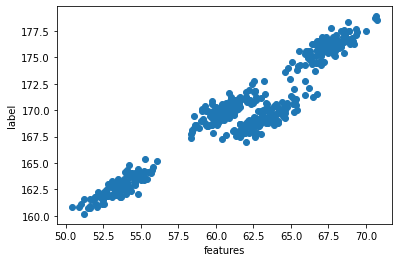

In [2]:
dataset = pd.read_csv("UAS_ML2021_DATASET02.csv")

features = dataset['Atribut_01']
label = dataset['Atribut_02']

plt.scatter(features,label)
plt.xlabel('features')
plt.ylabel('label')
plt.show()

In [3]:
# Data normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

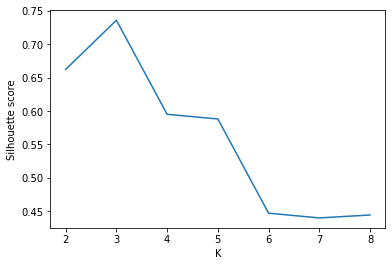

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

Berdasarkan graph diatas, K=3.

In [5]:
cluster = KMeans (n_clusters=3).fit(scaled_data)
pred = cluster.predict(scaled_data)
center = cluster.cluster_centers_

# Silhoutte Score
score = silhouette_score (scaled_data, pred, metric='euclidean')
print (f"For K = 3, score is {score}")

For K = 3, score is 0.7356847709879414


In [6]:
kmeans = KMeans(n_clusters=3).fit(scaled_data)
centre_k = kmeans.cluster_centers_
print(centre_k)

[[ 1.197698    1.32922733]
 [-1.47732521 -1.40637377]
 [ 0.12696481  0.02289726]]


In [7]:
# Initialiaze means, covariance, and mixing coefficient based on k-Means parameters
mu = np.array(centre_k)
sigma = np.array([[[.5, .5], [.5, .5]],
                  [[.5, .5], [.5, .5]],
				[[.5, .5], [.5, .5]]])
phi = np.array([.5, .5, .5])

In [8]:
print(dataset.describe())
print(dataset.shape)

       Atribut_01  Atribut_02
count  500.000000  500.000000
mean    61.270240  169.515781
std      5.196976    4.805095
min     50.433644  160.182164
25%     57.772791  166.607599
50%     61.961518  169.726252
75%     65.439332  172.837284
max     70.700456  178.894770
(500, 2)


In [9]:
# Calculate initial value of log likelihood
likelihood = np.zeros( (500, 3) )

# Responsibility (resp) shows the probability of every single item belong to cluster 0 or cluster 1 (only 2 cluster
resp = np.zeros((500,3))

In [10]:
for i in range(3):
    likelihood[:,i] = multivariate_normal.pdf(scaled_data, mu[i], sigma[i], allow_singular=True)
    resp[:, i] = phi[i] * likelihood[:,i]

# Rumus log likelihood
loglikelihood = np.sum(np.log(np.sum(resp, axis = 1)))

resp = resp / resp.sum(axis = 1, keepdims = 1)

print(loglikelihood)

-701.494140915368


In [11]:
# Recalculate means and covariance
for i in range(3):
    weight = resp[:, [i]]
    total_weight = weight.sum()
    mu[i] = (scaled_data * weight).sum(axis=0) / total_weight
    sigma[i] = np.cov(scaled_data.T, aweights=(weight/total_weight).flatten(), bias=True)
# Recalculate mixing coefficient pj and please note the pj
# now changes from (3/7,4/7) to (2/7,5/7)
phi = resp.mean(axis=0)
print (phi)
print('\n')
print (mu)
print('\n')
print (sigma)

[0.29879844 0.26889457 0.43230699]


[[ 0.9087066   0.94806082]
 [-1.2489324  -1.19302134]
 [ 0.1487624   0.08678524]]


[[[0.27081609 0.29901295]
  [0.29901295 0.40458597]]

 [[0.34278157 0.30429119]
  [0.30429119 0.29823786]]

 [[0.34970263 0.28364414]
  [0.28364414 0.33396724]]]


In [12]:
for j in range (100):
    for i in range(3):
        likelihood[:,i] = multivariate_normal.pdf(scaled_data, mu[i], sigma[i], allow_singular=True)
        resp[:, i] = phi[i] * likelihood[:,i]

    # Rumus log likelihood
    loglikelihood = np.sum(np.log(np.sum(resp, axis = 1)))

    resp = resp / resp.sum(axis = 1, keepdims = 1)
    
    for i in range(3):
        weight = resp[:, [i]]
        total_weight = weight.sum()
        mu[i] = (scaled_data * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(scaled_data.T, aweights=(weight/total_weight).flatten(), bias=True)
    
#     if(loglikelihood[j] == loglikelihood[j-1]):
#         j = 100
#         print("We found log likelihood convergence at ", j,"-th Iterations")
    
    print("Epoch : ",j,"  | Loglikelihood : ",loglikelihood)

Epoch :  0   | Loglikelihood :  -675.083192587801
Epoch :  1   | Loglikelihood :  -581.8132574391518
Epoch :  2   | Loglikelihood :  -474.04774492758605
Epoch :  3   | Loglikelihood :  -434.0488002585404
Epoch :  4   | Loglikelihood :  -410.9640284566687
Epoch :  5   | Loglikelihood :  -399.1057411701005
Epoch :  6   | Loglikelihood :  -397.6936952078327
Epoch :  7   | Loglikelihood :  -397.6115742051681
Epoch :  8   | Loglikelihood :  -397.60542114677446
Epoch :  9   | Loglikelihood :  -397.6049446452311
Epoch :  10   | Loglikelihood :  -397.6049075527442
Epoch :  11   | Loglikelihood :  -397.60490466202305
Epoch :  12   | Loglikelihood :  -397.60490443667527
Epoch :  13   | Loglikelihood :  -397.6049044191068
Epoch :  14   | Loglikelihood :  -397.6049044177371
Epoch :  15   | Loglikelihood :  -397.6049044176303
Epoch :  16   | Loglikelihood :  -397.604904417622
Epoch :  17   | Loglikelihood :  -397.604904417621
Epoch :  18   | Loglikelihood :  -397.60490441762124
Epoch :  19   | Logl

In [ ]:
Seperti yang dapat lihat, pada epoch ke

In [13]:
GMM = GaussianMixture (n_components=3).fit(scaled_data)
labels = GMM.predict (scaled_data)
optimal = GMM.score(scaled_data)
optimal

-0.7853616483298629

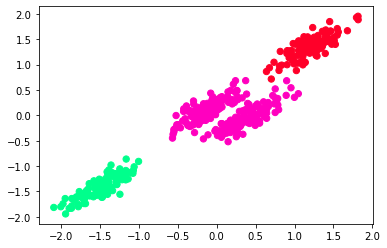

In [14]:
plt.scatter (scaled_data[:, 0], scaled_data[:, 1], c = labels, s = 40, cmap='gist_rainbow')